In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr= np.array([
    [3,5,9],
    [2,3,0],
    [1,2,3]
])

In [3]:
img = cv2.imread('D:\DAIAugust2025\Python\Anurag\OpenCV\datasets\image_dataset\images\dog.jpg')

In [4]:
kernel = np.zeros([3,3]) + 1/9

In [5]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [6]:
blurred_image = cv2.filter2D(img,-1,kernel)
cv2.imshow('image',img)
cv2.imshow('blured_image',blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
kernel = np.zeros([9,9]) + 1/81

blurred_image = cv2.filter2D(img,-1,kernel)
cv2.imshow('image',img)
cv2.imshow('blured_image',blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gaussian Kernel

In [8]:
#Column Kernel
kernel_size = 5
kernel = cv2.getGaussianKernel(kernel_size,1.23)
kernel

array([[0.08975704],
       [0.2419134 ],
       [0.33665912],
       [0.2419134 ],
       [0.08975704]])

In [9]:
gaussian_blurred_image = cv2.filter2D(img,-1,kernel)
gaussian_blurred_image = np.hstack([img,gaussian_blurred_image])

In [10]:
cv2.imshow("gaussian blurred image",gaussian_blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Median Kernel
###### All values are sorted and median is selected

In [16]:
img_gray = cv2.imread('D:\DAIAugust2025\Python\Anurag\OpenCV\datasets\image_dataset\images\dog.jpg')
# median_img = cv2.medianBlur(img_gray,15)

NameError: name 'median_img' is not defined

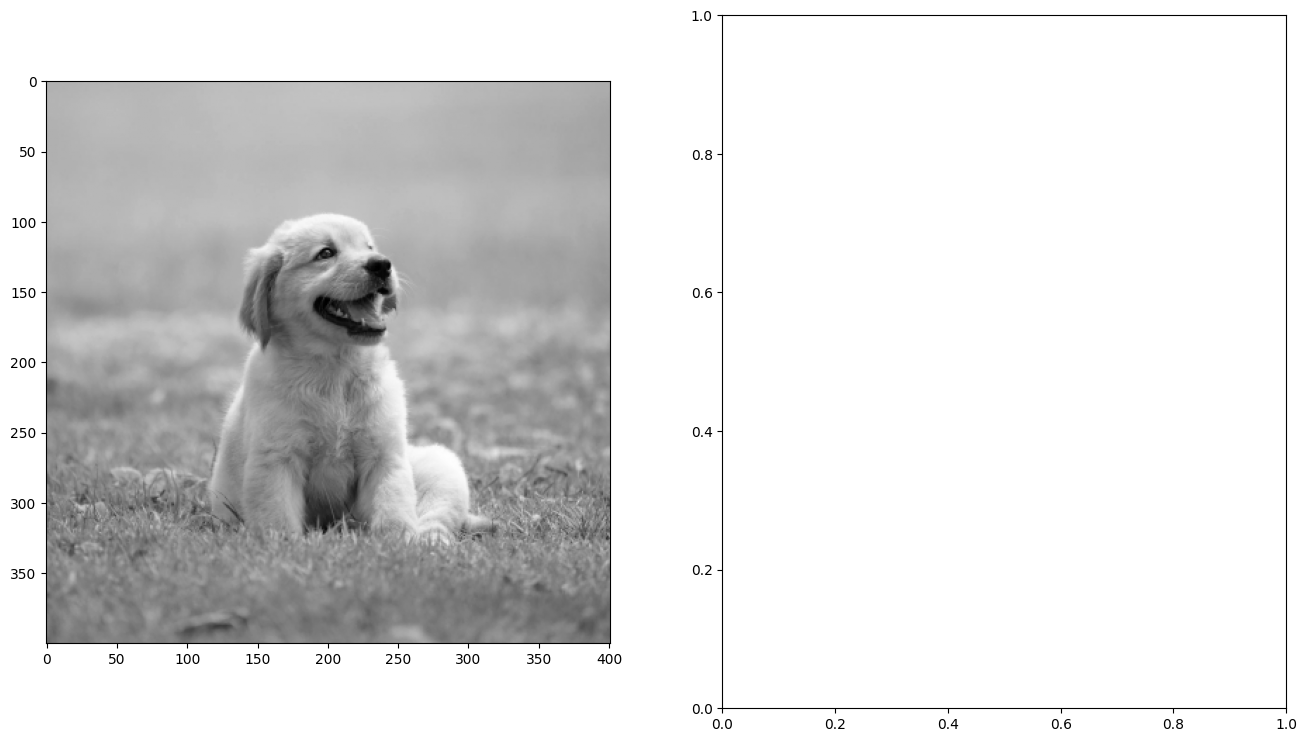

In [12]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.imshow(img_gray,cmap = 'gray')
plt.subplot(122)
plt.imshow(median_img ,cmap = 'gray')

Blurring selected area

In [ ]:
img_gray.shape

(400, 401)

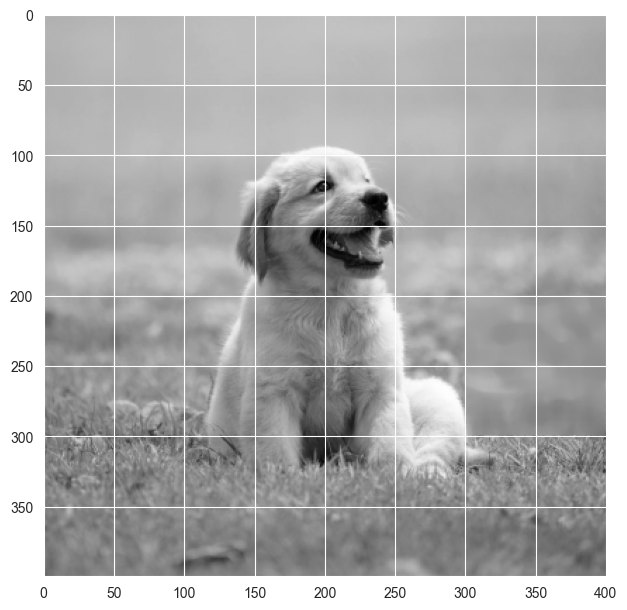

In [ ]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.imshow(img_gray,cmap = 'gray')

In [ ]:
height, width = img_gray.shape[0], img_gray.shape[0]
startRow = 200
endRow = 300
startCol = 300
endCol = 400

In [ ]:
croppedPart = img_gray[startRow:endRow,startCol:endCol]

In [ ]:
blurred_patch = cv2.medianBlur(croppedPart,15)
img_gray[startRow:endRow , startCol:endCol] = blurred_patch

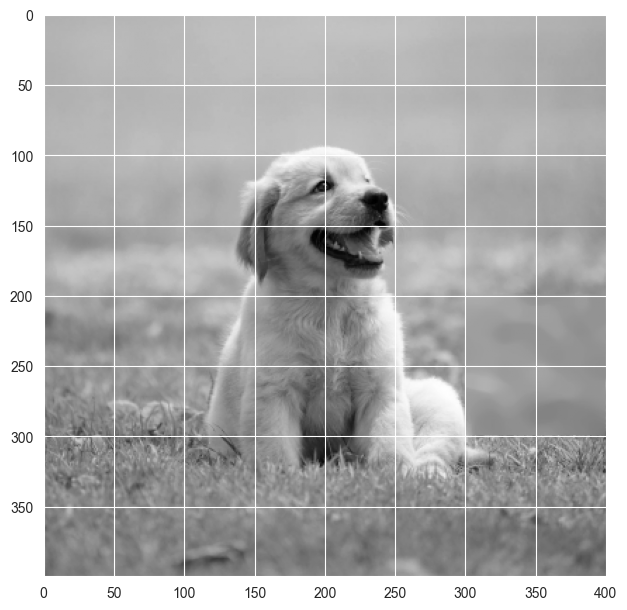

In [ ]:
plt.figure(figsize = (16,9))
plt.subplot(122)
plt.imshow(img_gray,cmap = 'gray')

Thresholding

In [36]:
img = cv2.imread('D:\DAIAugust2025\Python\Anurag\OpenCV\datasets\image_dataset\images\dog.jpg',0)

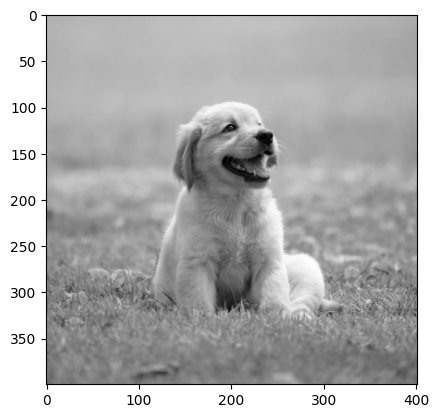

In [40]:
plt.imshow(img,cmap = 'gray')

In [38]:
binary_image = img >130

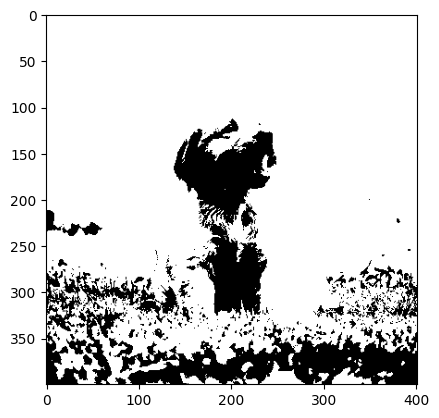

In [39]:
plt.imshow(binary_image,cmap = 'gray')

In [41]:
binary_image.dtype

dtype('bool')

In [42]:
binary_image = binary_image.astype(np.uint8) * 255
binary_image.dtype

dtype('uint8')

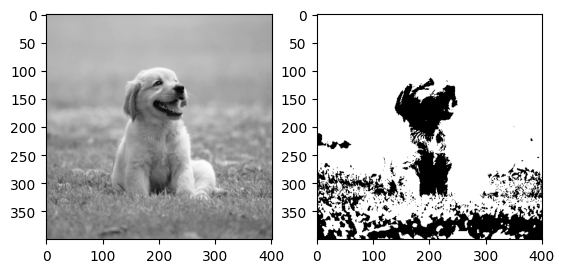

In [43]:
plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.subplot(122)
plt.imshow(binary_image,cmap='gray')

Corner Detection

In [44]:
img = cv2.imread('D:\DAIAugust2025\Python\Anurag\OpenCV\datasets\image_dataset\images\circle.png',0)
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

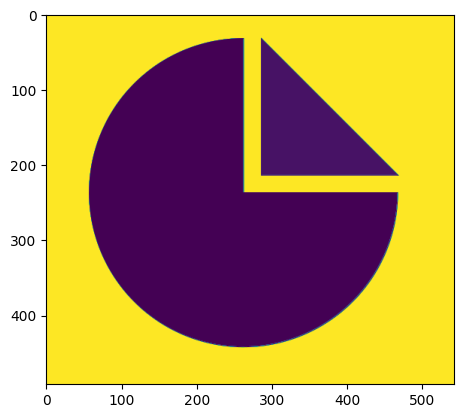

In [46]:
plt.imshow(img)

In [47]:
corners = cv2.cornerHarris(img,blockSize = 2,ksize = 3,k = 0.04)

In [48]:
corners.min()

np.float32(-0.010963322)

In [49]:
corners.shape

(492, 543)

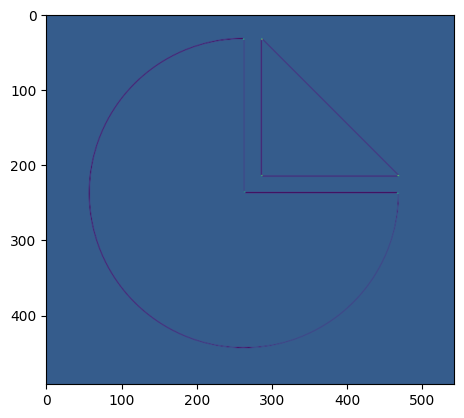

In [51]:
plt.imshow(corners)

In [52]:
corners.min(),corners.max(),np.median(corners)

(np.float32(-0.010963322), np.float32(0.026689459), np.float32(0.0))

In [54]:
img_new = img.copy()
img_new[corners >0.01 * corners.max()] = [255]

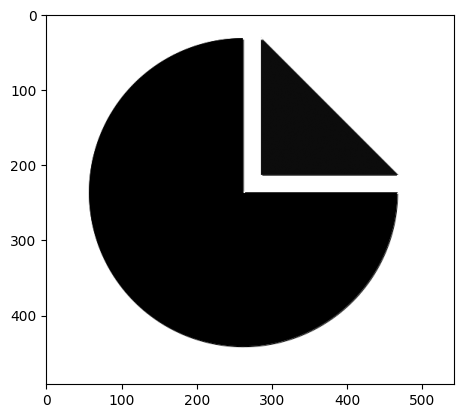

In [55]:
plt.imshow(img_new,cmap = 'gray')

In [56]:
img_new = corners <corners.max()/2

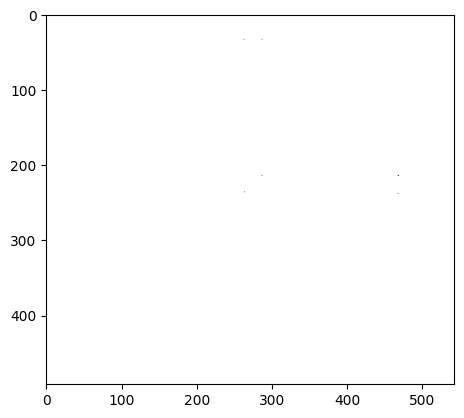

In [58]:
plt.imshow(img_new,cmap = 'gray')